In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("WAM3 Annual Emmissions Development.csv", index_col=0)

df = df.rename(columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"})

df = df.transpose()
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
emissions_per_kwh,0.501099,0.499158,0.501063,0.504227,0.50432,0.497428,0.484564,0.473826,0.471351,0.462743,0.445586,0.420354,0.38773,0.348563,0.303808,0.254482,0.201608


In [2]:
black_coal = 5667
gas = 2376
electricity = 20408
heat_pump = 667
coal_em_per_kg = 3.64
gas_em_per_kg = 1.85

In [3]:
emissions_per_source = [
    black_coal,
    gas,
    electricity,
    heat_pump,
    coal_em_per_kg,
    gas_em_per_kg,
]
emissions_per_source

[5667, 2376, 20408, 667, 3.64, 1.85]

In [4]:
house_150_sqm = pd.DataFrame(columns=df.columns)

house_150_sqm.loc["UH"] = black_coal * coal_em_per_kg
house_150_sqm.loc["PL"] = gas * gas_em_per_kg
house_150_sqm.loc["TC"] = df.loc["emissions_per_kwh"] * heat_pump
house_150_sqm.loc["EL"] = df.loc["emissions_per_kwh"] * electricity

house_150_sqm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
UH,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000,20627.880000
PL,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000,4395.600000
TC,334.232921,332.938424,334.208700,336.319459,336.381273,331.784356,323.204040,316.042262,314.391311,308.649465,297.205532,280.375873,258.616177,232.491215,202.639930,169.739621,134.472529
EL,10226.424973,10186.817637,10225.683869,10290.266136,10292.157462,10151.506961,9888.977591,9669.850786,9619.337133,9443.655585,9093.508977,8578.576938,7912.802021,7113.464347,6200.113483,5193.472528,4114.415848


Text(0, 0.5, 'Roční emise CO2 (kg)')

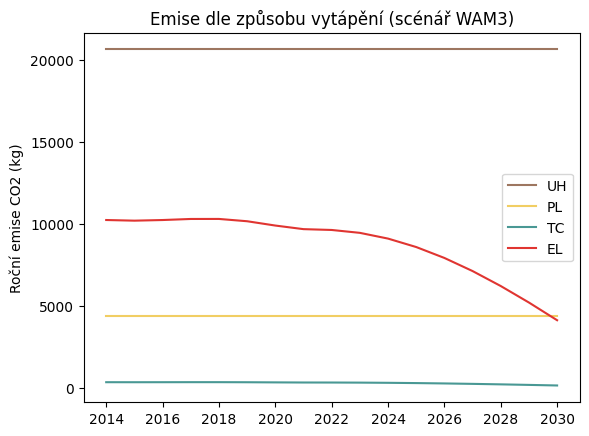

In [5]:
df_transposed = house_150_sqm.transpose()

colors_dict = {
    "UH": "#9D7660",
    "PL": "#F1CE63",
    "EL": "#e03531",
    "TC": "#499894",
}

colors = [colors_dict[column] for column in df_transposed.columns]

df_transposed.plot(color=colors)
plt.title("Emise dle způsobu vytápění (scénář WAM3)")
plt.ylabel("Roční emise CO2 (kg)")